## Estimating C

Notebook dedicated to trying to work out a reasonable estimate for the constant C, which is what the flow from I to j at t gets divided by.

In [47]:
# Import those librariess
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import collections

In [3]:
# Read in the unfiltered dataframes
wa_297 = os.listdir("/Volumes/HardDrive/WA_297/")[:-1]

d = {}
for i in range(len(wa_297)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/WA_297/"+wa_297[i], header = None, sep ='\t')

In [4]:
#Find minimum entry in all the ORIGINAL GOOGLE datasets
# Takes a while to run, so if you don't want to run it again- the answer is -16.466 (ie raise e to the power of that)
# Similarly, the max is -8.42.
minn =1
maxx = 0
allvals = []
# Iterate over all dataframes
for i in range(len(wa_297)-40):
    print(i)
    df = pd.read_csv("/Volumes/HardDrive/weekbyweek/agg_epi_mobility_covid_"+wa_297[i][7:], header = None, sep =',')
    #Take column with the flows
    data = df[7]
    
    # Generate a list of all values (for later)
    for i in data:
        allvals.append(math.exp(i))
    
    # Find the min and max, compare to our current ones.
    mi = min(data)
    mx = min(-1*data)
    if mi < minn:
        minn = mi
    if mx > maxx:
        maxx = mx
        
print(minn,-maxx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
-16.4466 -8.42


In [5]:
# Print those mins and maxes
print(minn,-maxx)
print(math.exp(minn),math.exp(-maxx))

-16.4466 -8.42
7.199997969098847e-08 0.00022041465283014714


In [6]:
minn = math.exp(minn)
maxx = math.exp(-maxx)

In [7]:
keepacopy = allvals

In [9]:
smallest_allvals= []
for i in allvals:
    if i < 4*minn:
        smallest_allvals.append(i)

In [10]:
len(smallest_allvals)

119358001

(array([   77.,  6751., 14133., 12440., 10718.,  9071.,  8374.,  7255.,
         6568.,  5739.,  6342.,  4779.,  4311.,  3964.,  3540.,  3405.,
         3115.,  2937.,  2704.,  3135.]),
 array([8.20038204e-08, 9.22032580e-08, 1.02402696e-07, 1.12602133e-07,
        1.22801571e-07, 1.33001008e-07, 1.43200446e-07, 1.53399883e-07,
        1.63599321e-07, 1.73798758e-07, 1.83998196e-07, 1.94197634e-07,
        2.04397071e-07, 2.14596509e-07, 2.24795946e-07, 2.34995384e-07,
        2.45194821e-07, 2.55394259e-07, 2.65593696e-07, 2.75793134e-07,
        2.85992572e-07]),
 <a list of 20 Patch objects>)

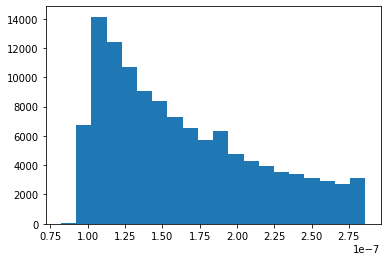

In [11]:
# Only takes a fraction of the entries but still gives a pretty good indication of the behaviour
plt.hist(x=smallest_allvals[:int(len(smallest_allvals)/1000)], bins=20)

Since we can see that there's a steep cutoff close to the minimum, we can conclude that Google removes the data which after the addition of noise is still less than 100 people. Hence we should be able to take the minimum value found, and divide 100 by it to get a pretty good approximation of C.

In [12]:
C = 100/minn
print(C)

1388889280.652339


This is our estimate for C. Let's see if we can get what the biggest flow in our 297 dataset is in a given week, and see if it makes logical sense for C to be this size.

In [12]:
# This takes in the adjacency matrices between towns and finds the biggest relative flow between two towns
# Again, takes a while to run, gives answer: 0.00021799687136366268
k =0
for i in range(len(wa_297)):
    data = d[str(i)]
    for v in data:
        l = list(data[v])
        for i in l:
            if i > k:
                k = i
print(k)

0.00021799687136366268


In [13]:
C*k

302773.5178527379

## Further Adjustments

In [40]:
minn = []
for i in range(3000):
    minn.append([-16.4466+i/10000,0])

In [41]:
minn[-1]

[-16.1467, 0]

In [42]:
vals = {}

In [52]:
master = {}
# Iterate over all dataframes
for i in range(10):
    print(i)
    df = pd.read_csv("/Volumes/HardDrive/weekbyweek/agg_epi_mobility_covid_"+wa_297[i][7:], header = None, sep =',')
    #Take column with the flows
    data = list(df[7])
    
    # Generate a list of all values (for later)
    master[i] = dict(collections.Counter(data))

0
1
2
3
4
5
6
7
8
9


In [53]:
len(occ)

13227

In [56]:
occ = {}
for i in range(10):
    for j in list(master[i].keys()):
        occ[j] = occ.get(j,0) + master[i].get(j,0)

In [57]:
od = collections.OrderedDict(sorted(occ.items()))

In [65]:
tot = [list(od.keys()),list(od.values())]

In [73]:
max(tot[1])

584137

In [74]:
for i in range(len(tot[1])):
    if tot[1][i] == 584137:
        print(i)

29


In [75]:
tot[0][29]

-16.0598

In [76]:
100/math.exp(-16.0598)

943370997.6634355

(-16.5, -15)

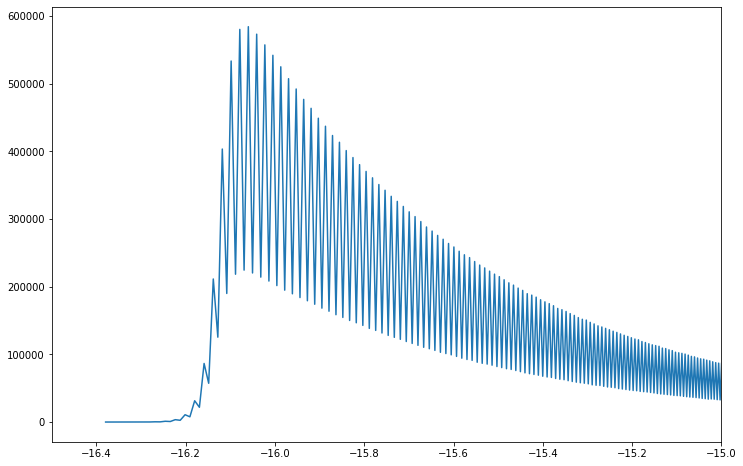

In [72]:
plt.figure(figsize = (12,8))
plt.plot(tot[0],tot[1])
plt.xlim([-16.5,-15])

In [17]:
minn

[[-16.4466, 0],
 [-16.4465, 0],
 [-16.4464, 0],
 [-16.4463, 0],
 [-16.4462, 0],
 [-16.4461, 0],
 [-16.446, 0],
 [-16.4459, 0],
 [-16.4458, 0],
 [-16.4457, 0],
 [-16.4456, 0],
 [-16.4455, 0],
 [-16.4454, 0],
 [-16.4453, 0],
 [-16.4452, 0],
 [-16.4451, 0],
 [-16.445, 0],
 [-16.4449, 0],
 [-16.4448, 0],
 [-16.4447, 0],
 [-16.4446, 0],
 [-16.4445, 0],
 [-16.4444, 0],
 [-16.4443, 0],
 [-16.4442, 0],
 [-16.4441, 0],
 [-16.444, 0],
 [-16.4439, 0],
 [-16.4438, 0],
 [-16.4437, 0]]

In [28]:
#Find minimum entry in all the ORIGINAL GOOGLE datasets
# Takes a while to run, so if you don't want to run it again- the answer is -16.466 (ie raise e to the power of that)
# Similarly, the max is -8.42.
minn =1
maxx = 0
allvals = []
# Iterate over all dataframes
for i in range(len(wa_297)-40):
    print(i)
    df = pd.read_csv("/Volumes/HardDrive/weekbyweek/agg_epi_mobility_covid_"+wa_297[i][7:], header = None, sep =',')
    #Take column with the flows
    data = df[7]
    
    # Generate a list of all values (for later)
    for i in data:
        allvals.append(math.exp(i))
    
    # Find the min and max, compare to our current ones.
    mi = min(data)
    mx = min(-1*data)
    if mi < minn:
        minn = mi
    if mx > maxx:
        maxx = mx
        
print(minn,-maxx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
-16.4466 -8.42


In [32]:
# Print those mins and maxes
print(minn,-maxx)
print(math.exp(minn),math.exp(-maxx))

-16.4466 -8.42
7.199997969098847e-08 0.00022041465283014714


In [36]:
smallest_allvals= []
for i in allvals:
    if i < 2*minn:
        smallest_allvals.append(i)

In [37]:
smallest_allvals

[]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

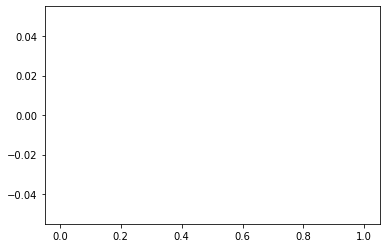

In [35]:
# Only takes a fraction of the entries but still gives a pretty good indication of the behaviour
plt.hist(x=smallest_allvals, bins=20)

In [ ]:
plt.hist(x=allvals[:int(len(allvals)/100)], bins=1000,alpha=0.7, rwidth=0.85)

In [ ]:
smallest_allvals = []
for i in allvals:
    if i < 10**(-6):
        small_allvals.append(i)

In [ ]:
hist, bin_edges = np.histogram(allvals[:int(len(allvals)/10000)],range = (minn,maxx/2), bins = 100)

In [ ]:
vals = []
for i in range(2000):
    print(i)
    binn_low = (5*10**-8)*(i) +minn
    binn_up = (5*10**-8)*(i+1) + minn
    vals.append([(binn_low+binn_up)/2,0])
    for j in range(len(allvals)):
        if (allvals[j] >= binn_low) & (allvals[j] < binn_up):
                vals[-1][1] += 1
                del allvals[j]